In [2]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
 def load_dataset():
    (x_train,y_train),(x_test,y_test) =  mnist.load_data()
    train_data = np.concatenate((x_train,x_test), axis=0)
    train_data = train_data/255;
    train_data = train_data*2 -1
    train_data = train_data.reshape([-1,28*28])
    return train_data

In [4]:
data = load_dataset()


In [70]:
def display_images(data,image_size=28):
    fig,axes = plt.subplots(10,15,figsize=(10,4))
    for i,ax in enumerate(axes.flatten()):
        img = data[i,:]
        #img = (img-img.min())/(img.max()-img.min())
        ax.imshow(img.reshape(image_size,image_size),cmap = 'gray')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    plt.subplots_adjust(wspace=0,hspace=0)
    plt.show()

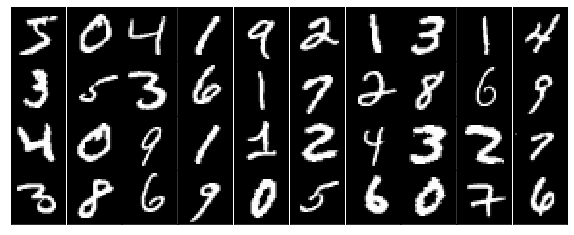

In [6]:
display_images(data)

In [42]:
def dense(x,n_outputs,activation=None):
    return tf.layers.dense(x,n_outputs,
    activation=activation,
    use_bias=True,
    kernel_initializer = tf.random_normal_initializer(mean=0.0,stddev = 0.02), 
    bias_initializer=tf.zeros_initializer(),
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    trainable=True,
    name=None,
    reuse=None)


In [43]:
def generator(z,alpha = 0.2):
    with tf.variable_scope('generator',reuse=tf.AUTO_REUSE):
        fc1 = dense(z,256)
        fc1 = tf.nn.leaky_relu(fc1,alpha)
        fc2 = dense(fc1,512)
        fc2 = tf.nn.leaky_relu(fc2,alpha)       
        fc3 = dense(fc2,1024)
        fc3 = tf.nn.leaky_relu(fc3,alpha)
        out = dense(fc3,28*28)
        out = tf.tanh(out)
        return out

In [44]:
def discriminator(x,alpha = 0.2):
    with tf.variable_scope('discriminator',reuse = tf.AUTO_REUSE):
        fc1 = dense(x,1024)
        fc1 = tf.nn.leaky_relu(fc1,alpha)
        fc2 = dense(fc1,512)
        fc2 = tf.nn.leaky_relu(fc2,alpha)
        fc3 = dense(fc2,256)
        fc3 = tf.nn.leaky_relu(fc3,alpha)
        out = dense(fc3,1)
        return out

In [53]:
noise_size = 100
learning_rate = 0.0002
batch_size = 128
epochs = 100
beta1 = 0.5
tf.reset_default_graph()
X_real = tf.placeholder(tf.float32,(None,28*28),name = 'inpt_real')
z = tf.placeholder(tf.float32,(None,noise_size),name = 'input_noise')

In [54]:
g_sample = generator(z)
d_real_out = discriminator(X_real)
d_fake_out = discriminator(g_sample)

In [55]:
g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_out,
                                                labels=tf.ones_like(d_fake_out)))
tf.summary.scalar('generator_loss',g_loss)

<tf.Tensor 'generator_loss:0' shape=() dtype=string>

In [56]:
d_real_loss = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=d_real_out, labels=tf.ones_like(d_real_out)))
d_fake_loss = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_out, labels=tf.zeros_like(d_fake_out)))
d_loss = d_real_loss + d_fake_loss
tf.summary.scalar('discriminator_loss', d_loss)


<tf.Tensor 'discriminator_loss:0' shape=() dtype=string>

In [65]:
train_vars = tf.trainable_variables()
d_vars = [var for var in train_vars if var.name.startswith('discriminator')]
g_vars = [var for var in train_vars if var.name.startswith('generator')]


[<tf.Variable 'generator/dense/kernel:0' shape=(100, 256) dtype=float32_ref>,
 <tf.Variable 'generator/dense/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'generator/dense_1/kernel:0' shape=(256, 512) dtype=float32_ref>,
 <tf.Variable 'generator/dense_1/bias:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'generator/dense_2/kernel:0' shape=(512, 1024) dtype=float32_ref>,
 <tf.Variable 'generator/dense_2/bias:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'generator/dense_3/kernel:0' shape=(1024, 784) dtype=float32_ref>,
 <tf.Variable 'generator/dense_3/bias:0' shape=(784,) dtype=float32_ref>]

In [66]:
with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
    d_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    g_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

In [59]:
def gen_batches(data, batch_size, shuffle=True):
 
    n_data = data.shape[0]
    if shuffle:
        idx = np.arange(n_data)
        np.random.shuffle(idx)
        data = data[idx]

    for i in range(0, n_data, batch_size):
        batch = data[i:i + batch_size]
        yield batch

In [77]:
n_sample_display = 80
sample_z = np.random.uniform(-1, 1, size=(n_sample_display, noise_size))
steps = 0

Epoch 1/100 - discriminator loss: 1.3696, generator Loss: 0.6929
Epoch 1/100 - discriminator loss: 1.3030, generator Loss: 0.8527
Epoch 1/100 - discriminator loss: 1.2800, generator Loss: 0.7937
Epoch 1/100 - discriminator loss: 0.7803, generator Loss: 0.9196
Epoch 1/100 - discriminator loss: 0.9483, generator Loss: 1.4534
Epoch 1/100 - discriminator loss: 1.3155, generator Loss: 0.7320


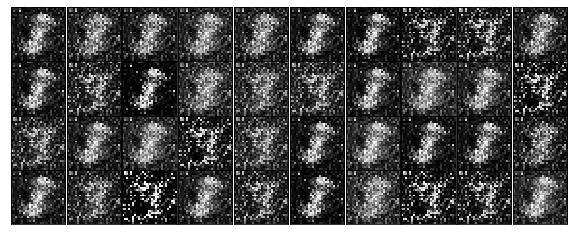

Epoch 2/100 - discriminator loss: 1.1177, generator Loss: 1.2679
Epoch 2/100 - discriminator loss: 1.2751, generator Loss: 0.7947
Epoch 2/100 - discriminator loss: 1.1544, generator Loss: 1.0340
Epoch 2/100 - discriminator loss: 1.2051, generator Loss: 0.8571
Epoch 2/100 - discriminator loss: 1.2752, generator Loss: 0.8532


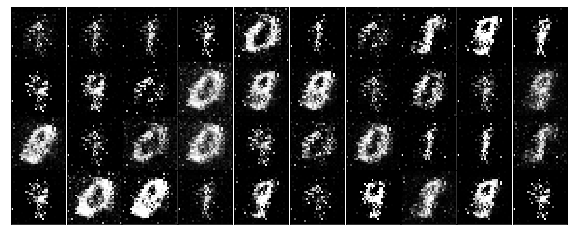

Epoch 3/100 - discriminator loss: 0.8584, generator Loss: 1.0999
Epoch 3/100 - discriminator loss: 1.1101, generator Loss: 0.7079
Epoch 3/100 - discriminator loss: 1.3289, generator Loss: 1.1071
Epoch 3/100 - discriminator loss: 1.0391, generator Loss: 0.4204
Epoch 3/100 - discriminator loss: 0.9074, generator Loss: 1.3672
Epoch 3/100 - discriminator loss: 0.9951, generator Loss: 1.9976


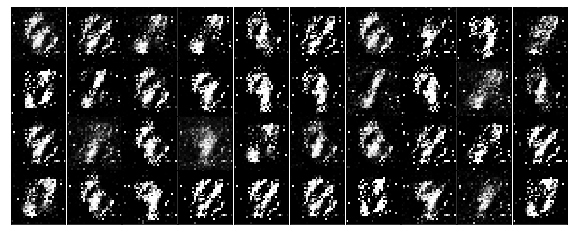

Epoch 4/100 - discriminator loss: 1.0049, generator Loss: 0.9605
Epoch 4/100 - discriminator loss: 1.0031, generator Loss: 0.8403
Epoch 4/100 - discriminator loss: 1.0480, generator Loss: 2.1036
Epoch 4/100 - discriminator loss: 0.6715, generator Loss: 1.5558
Epoch 4/100 - discriminator loss: 1.0406, generator Loss: 1.6120


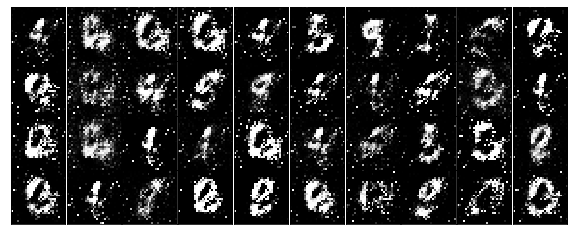

Epoch 5/100 - discriminator loss: 1.3629, generator Loss: 0.3275
Epoch 5/100 - discriminator loss: 0.8844, generator Loss: 2.3477
Epoch 5/100 - discriminator loss: 0.9222, generator Loss: 1.0257
Epoch 5/100 - discriminator loss: 0.8733, generator Loss: 1.6222
Epoch 5/100 - discriminator loss: 0.7270, generator Loss: 2.2743
Epoch 5/100 - discriminator loss: 0.8394, generator Loss: 0.7990


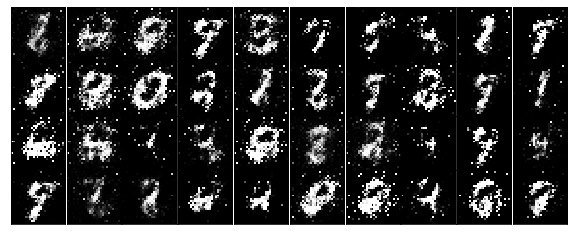

Epoch 6/100 - discriminator loss: 1.0490, generator Loss: 1.5606
Epoch 6/100 - discriminator loss: 0.9753, generator Loss: 0.9630
Epoch 6/100 - discriminator loss: 1.1073, generator Loss: 2.9495
Epoch 6/100 - discriminator loss: 0.9323, generator Loss: 1.9276
Epoch 6/100 - discriminator loss: 1.0151, generator Loss: 0.9388


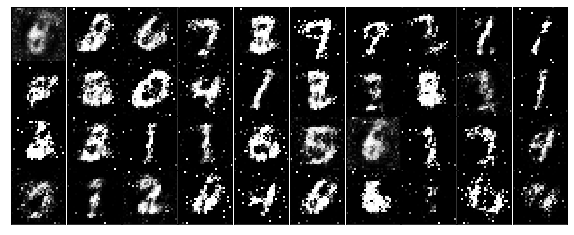

Epoch 7/100 - discriminator loss: 1.2027, generator Loss: 1.8404
Epoch 7/100 - discriminator loss: 1.0896, generator Loss: 1.0112
Epoch 7/100 - discriminator loss: 1.0138, generator Loss: 0.8809
Epoch 7/100 - discriminator loss: 1.1158, generator Loss: 1.1943
Epoch 7/100 - discriminator loss: 1.0639, generator Loss: 1.2734
Epoch 7/100 - discriminator loss: 1.1933, generator Loss: 0.9731


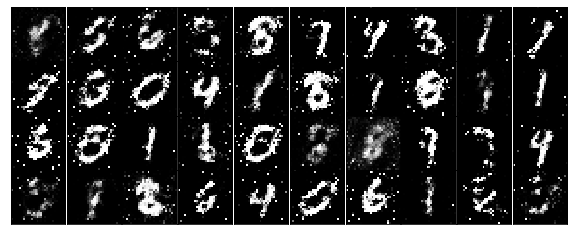

Epoch 8/100 - discriminator loss: 1.0804, generator Loss: 1.1811
Epoch 8/100 - discriminator loss: 1.0909, generator Loss: 0.9835
Epoch 8/100 - discriminator loss: 1.1088, generator Loss: 1.4080
Epoch 8/100 - discriminator loss: 1.1044, generator Loss: 1.1760
Epoch 8/100 - discriminator loss: 1.1102, generator Loss: 0.9289


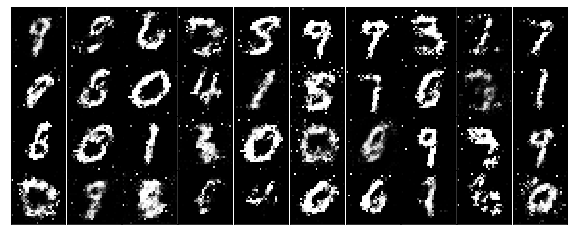

Epoch 9/100 - discriminator loss: 1.2354, generator Loss: 1.3026
Epoch 9/100 - discriminator loss: 1.1774, generator Loss: 1.3544
Epoch 9/100 - discriminator loss: 1.2451, generator Loss: 0.8775
Epoch 9/100 - discriminator loss: 1.1534, generator Loss: 0.9173
Epoch 9/100 - discriminator loss: 1.2424, generator Loss: 1.0006
Epoch 9/100 - discriminator loss: 1.0863, generator Loss: 1.0396


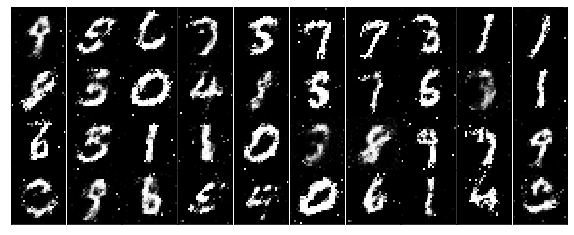

Epoch 10/100 - discriminator loss: 1.1367, generator Loss: 0.9376
Epoch 10/100 - discriminator loss: 1.0698, generator Loss: 1.0268
Epoch 10/100 - discriminator loss: 1.2348, generator Loss: 1.0474
Epoch 10/100 - discriminator loss: 1.1492, generator Loss: 0.8372
Epoch 10/100 - discriminator loss: 1.1106, generator Loss: 1.3372


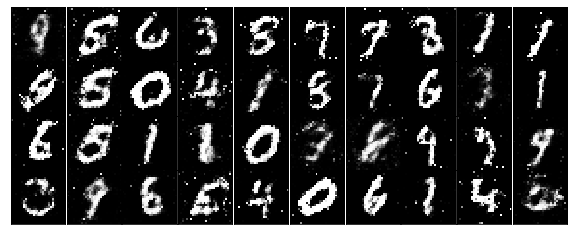

Epoch 11/100 - discriminator loss: 1.1565, generator Loss: 1.0478
Epoch 11/100 - discriminator loss: 1.1444, generator Loss: 0.9930
Epoch 11/100 - discriminator loss: 1.1553, generator Loss: 0.9184
Epoch 11/100 - discriminator loss: 1.1288, generator Loss: 1.5011
Epoch 11/100 - discriminator loss: 1.2194, generator Loss: 1.1276
Epoch 11/100 - discriminator loss: 1.1878, generator Loss: 0.9071


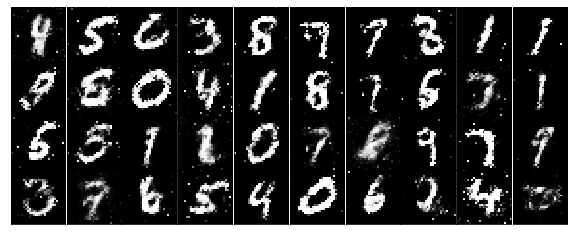

Epoch 12/100 - discriminator loss: 1.1527, generator Loss: 0.9602
Epoch 12/100 - discriminator loss: 1.2001, generator Loss: 0.9331
Epoch 12/100 - discriminator loss: 1.2029, generator Loss: 1.2160
Epoch 12/100 - discriminator loss: 1.2050, generator Loss: 0.9658
Epoch 12/100 - discriminator loss: 1.2921, generator Loss: 1.2518


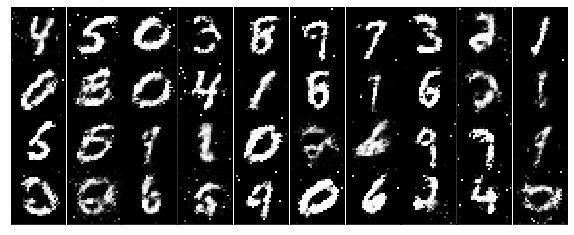

Epoch 13/100 - discriminator loss: 1.1935, generator Loss: 0.9304
Epoch 13/100 - discriminator loss: 1.1201, generator Loss: 0.9876
Epoch 13/100 - discriminator loss: 1.1318, generator Loss: 1.0765
Epoch 13/100 - discriminator loss: 1.1727, generator Loss: 0.8724
Epoch 13/100 - discriminator loss: 1.1800, generator Loss: 0.8287
Epoch 13/100 - discriminator loss: 1.2031, generator Loss: 1.0524


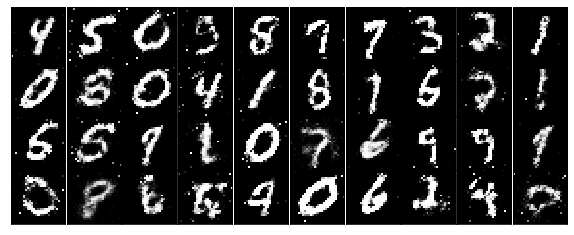

Epoch 14/100 - discriminator loss: 1.1378, generator Loss: 0.8638
Epoch 14/100 - discriminator loss: 1.4157, generator Loss: 1.3963
Epoch 14/100 - discriminator loss: 1.1987, generator Loss: 1.3256
Epoch 14/100 - discriminator loss: 1.1900, generator Loss: 0.8754
Epoch 14/100 - discriminator loss: 1.1406, generator Loss: 1.3766


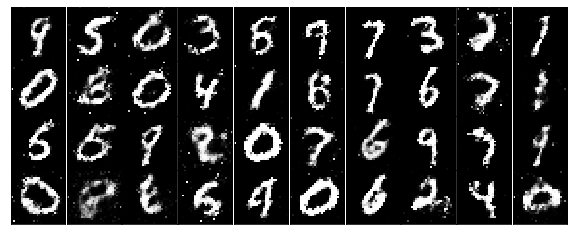

Epoch 15/100 - discriminator loss: 1.1928, generator Loss: 0.7957
Epoch 15/100 - discriminator loss: 1.2333, generator Loss: 1.0127
Epoch 15/100 - discriminator loss: 1.2485, generator Loss: 0.8245
Epoch 15/100 - discriminator loss: 1.1828, generator Loss: 1.0912
Epoch 15/100 - discriminator loss: 1.3152, generator Loss: 0.5621
Epoch 15/100 - discriminator loss: 1.2690, generator Loss: 0.9511


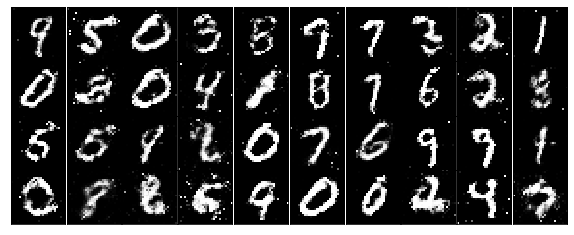

Epoch 16/100 - discriminator loss: 1.1964, generator Loss: 0.9472
Epoch 16/100 - discriminator loss: 1.1829, generator Loss: 1.1113
Epoch 16/100 - discriminator loss: 1.1528, generator Loss: 0.8544
Epoch 16/100 - discriminator loss: 1.1831, generator Loss: 0.9758
Epoch 16/100 - discriminator loss: 1.1294, generator Loss: 1.1009


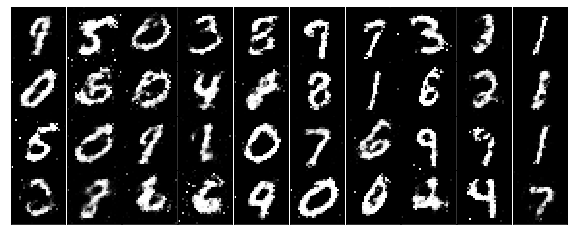

Epoch 17/100 - discriminator loss: 1.1820, generator Loss: 1.0022
Epoch 17/100 - discriminator loss: 1.2442, generator Loss: 0.7257
Epoch 17/100 - discriminator loss: 1.1615, generator Loss: 0.8847
Epoch 17/100 - discriminator loss: 1.1488, generator Loss: 1.1862
Epoch 17/100 - discriminator loss: 1.1933, generator Loss: 0.9536


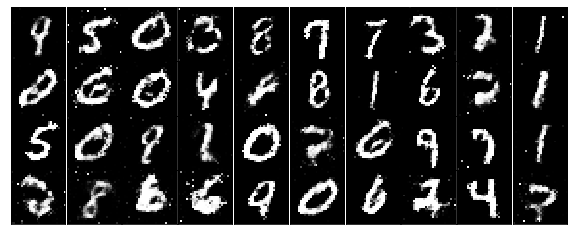

Epoch 18/100 - discriminator loss: 1.1237, generator Loss: 0.9821
Epoch 18/100 - discriminator loss: 1.1323, generator Loss: 0.9497
Epoch 18/100 - discriminator loss: 1.0990, generator Loss: 1.1037
Epoch 18/100 - discriminator loss: 1.2288, generator Loss: 0.7288
Epoch 18/100 - discriminator loss: 1.1522, generator Loss: 0.9420
Epoch 18/100 - discriminator loss: 1.0854, generator Loss: 1.1332


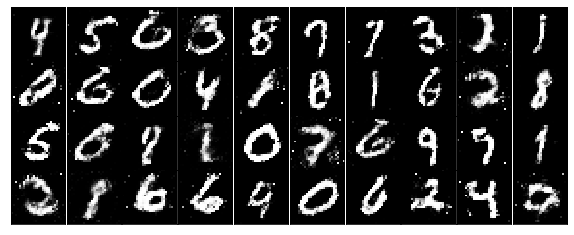

Epoch 19/100 - discriminator loss: 1.1037, generator Loss: 1.0481
Epoch 19/100 - discriminator loss: 1.1389, generator Loss: 1.1517
Epoch 19/100 - discriminator loss: 1.1691, generator Loss: 1.3905
Epoch 19/100 - discriminator loss: 1.0676, generator Loss: 1.2195
Epoch 19/100 - discriminator loss: 1.0918, generator Loss: 0.8839


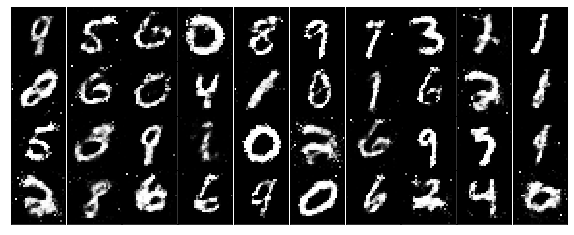

Epoch 20/100 - discriminator loss: 1.0824, generator Loss: 1.0601
Epoch 20/100 - discriminator loss: 1.0777, generator Loss: 1.1127
Epoch 20/100 - discriminator loss: 1.0904, generator Loss: 1.0530
Epoch 20/100 - discriminator loss: 1.1608, generator Loss: 0.9343
Epoch 20/100 - discriminator loss: 1.1913, generator Loss: 0.7268
Epoch 20/100 - discriminator loss: 1.1757, generator Loss: 0.8815


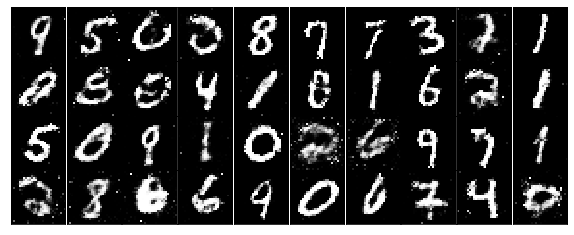

Epoch 21/100 - discriminator loss: 1.1712, generator Loss: 0.9498
Epoch 21/100 - discriminator loss: 1.1354, generator Loss: 0.9757
Epoch 21/100 - discriminator loss: 1.1329, generator Loss: 0.7579
Epoch 21/100 - discriminator loss: 1.1416, generator Loss: 1.0564
Epoch 21/100 - discriminator loss: 1.0597, generator Loss: 1.3349


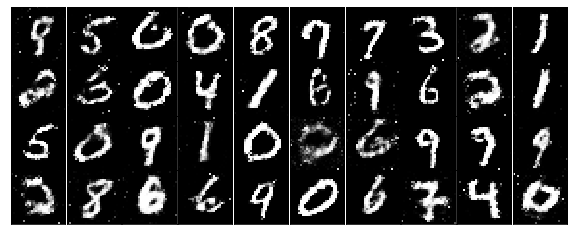

Epoch 22/100 - discriminator loss: 1.2398, generator Loss: 1.3651
Epoch 22/100 - discriminator loss: 1.1345, generator Loss: 1.0715
Epoch 22/100 - discriminator loss: 1.1726, generator Loss: 1.0635
Epoch 22/100 - discriminator loss: 1.0959, generator Loss: 1.0290
Epoch 22/100 - discriminator loss: 1.1512, generator Loss: 1.1371
Epoch 22/100 - discriminator loss: 1.3394, generator Loss: 1.6145


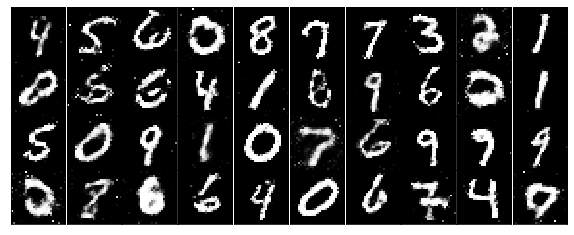

Epoch 23/100 - discriminator loss: 1.0895, generator Loss: 0.9783
Epoch 23/100 - discriminator loss: 1.2289, generator Loss: 0.8532
Epoch 23/100 - discriminator loss: 1.1370, generator Loss: 0.9249
Epoch 23/100 - discriminator loss: 1.2847, generator Loss: 1.2785
Epoch 23/100 - discriminator loss: 1.0842, generator Loss: 1.2933


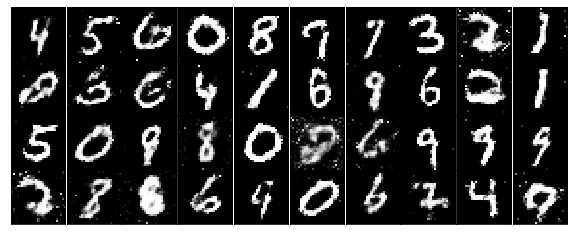

Epoch 24/100 - discriminator loss: 1.1450, generator Loss: 1.2054
Epoch 24/100 - discriminator loss: 1.1160, generator Loss: 0.9353
Epoch 24/100 - discriminator loss: 1.1068, generator Loss: 1.4571
Epoch 24/100 - discriminator loss: 1.2072, generator Loss: 1.5064
Epoch 24/100 - discriminator loss: 1.2640, generator Loss: 1.2562
Epoch 24/100 - discriminator loss: 1.1249, generator Loss: 1.1053


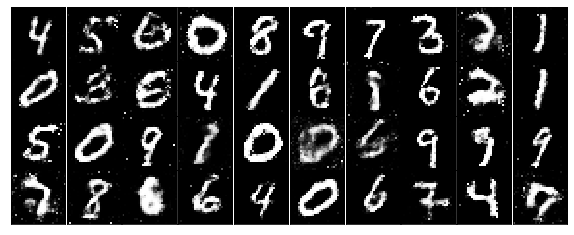

Epoch 25/100 - discriminator loss: 1.0864, generator Loss: 0.8905
Epoch 25/100 - discriminator loss: 1.1500, generator Loss: 1.1170
Epoch 25/100 - discriminator loss: 1.1143, generator Loss: 1.4101
Epoch 25/100 - discriminator loss: 1.1005, generator Loss: 1.0319
Epoch 25/100 - discriminator loss: 1.1221, generator Loss: 1.1056


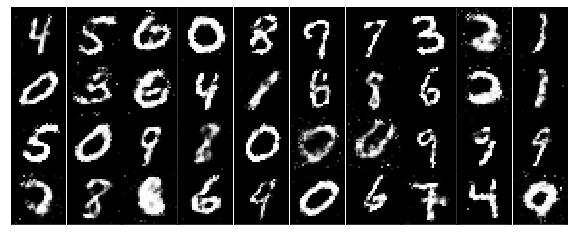

Epoch 26/100 - discriminator loss: 1.0761, generator Loss: 1.1152
Epoch 26/100 - discriminator loss: 1.2096, generator Loss: 0.7310
Epoch 26/100 - discriminator loss: 1.0745, generator Loss: 1.1715
Epoch 26/100 - discriminator loss: 1.1295, generator Loss: 1.0678
Epoch 26/100 - discriminator loss: 1.1206, generator Loss: 0.7450
Epoch 26/100 - discriminator loss: 1.1359, generator Loss: 1.0318


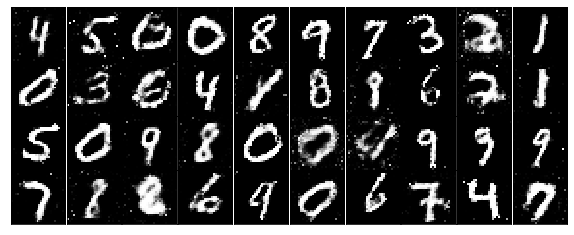

Epoch 27/100 - discriminator loss: 1.1275, generator Loss: 0.9413
Epoch 27/100 - discriminator loss: 1.2378, generator Loss: 0.7294
Epoch 27/100 - discriminator loss: 1.1264, generator Loss: 1.1895
Epoch 27/100 - discriminator loss: 1.0397, generator Loss: 0.9960
Epoch 27/100 - discriminator loss: 1.2093, generator Loss: 0.8352


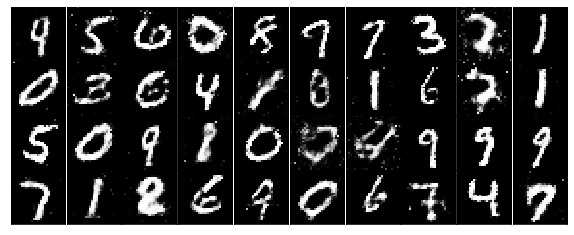

Epoch 28/100 - discriminator loss: 1.1435, generator Loss: 1.2667
Epoch 28/100 - discriminator loss: 1.0291, generator Loss: 1.0238
Epoch 28/100 - discriminator loss: 1.2010, generator Loss: 0.7720
Epoch 28/100 - discriminator loss: 1.1048, generator Loss: 1.0534
Epoch 28/100 - discriminator loss: 1.1922, generator Loss: 1.0630
Epoch 28/100 - discriminator loss: 1.1263, generator Loss: 0.7854


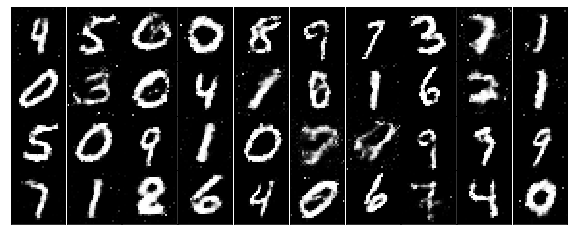

Epoch 29/100 - discriminator loss: 1.1808, generator Loss: 0.9937
Epoch 29/100 - discriminator loss: 1.1083, generator Loss: 1.2099
Epoch 29/100 - discriminator loss: 1.1321, generator Loss: 1.0978
Epoch 29/100 - discriminator loss: 1.0441, generator Loss: 1.0745
Epoch 29/100 - discriminator loss: 1.2049, generator Loss: 1.5619


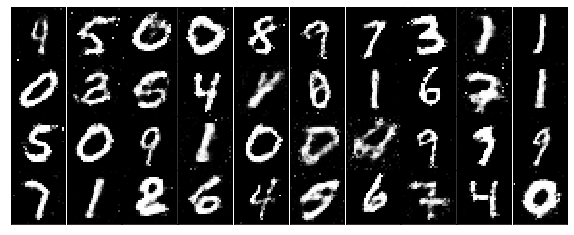

Epoch 30/100 - discriminator loss: 1.1202, generator Loss: 1.0208
Epoch 30/100 - discriminator loss: 1.0458, generator Loss: 0.8747
Epoch 30/100 - discriminator loss: 1.1265, generator Loss: 0.9054
Epoch 30/100 - discriminator loss: 1.0935, generator Loss: 1.0209
Epoch 30/100 - discriminator loss: 1.0346, generator Loss: 1.2848
Epoch 30/100 - discriminator loss: 1.0791, generator Loss: 0.9289


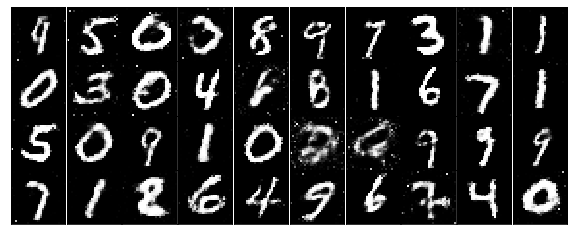

Epoch 31/100 - discriminator loss: 1.1003, generator Loss: 1.1330
Epoch 31/100 - discriminator loss: 1.0807, generator Loss: 1.0888
Epoch 31/100 - discriminator loss: 1.0085, generator Loss: 1.2733
Epoch 31/100 - discriminator loss: 1.0804, generator Loss: 0.8900
Epoch 31/100 - discriminator loss: 1.1809, generator Loss: 1.5648


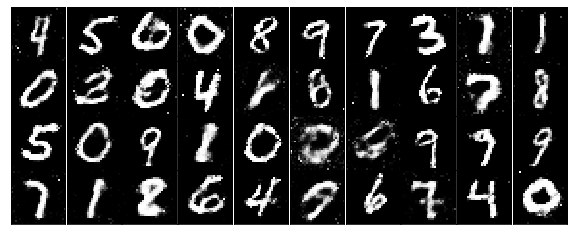

Epoch 32/100 - discriminator loss: 1.1577, generator Loss: 1.1018
Epoch 32/100 - discriminator loss: 1.2259, generator Loss: 0.9223
Epoch 32/100 - discriminator loss: 1.0543, generator Loss: 1.0941
Epoch 32/100 - discriminator loss: 1.1675, generator Loss: 1.2083
Epoch 32/100 - discriminator loss: 1.0426, generator Loss: 1.0751
Epoch 32/100 - discriminator loss: 1.1258, generator Loss: 1.1601


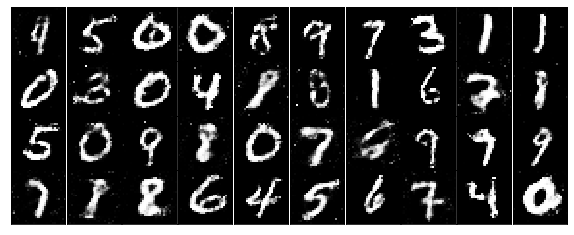

Epoch 33/100 - discriminator loss: 1.1077, generator Loss: 1.0382
Epoch 33/100 - discriminator loss: 1.1626, generator Loss: 1.3040
Epoch 33/100 - discriminator loss: 1.1919, generator Loss: 1.4058
Epoch 33/100 - discriminator loss: 1.0684, generator Loss: 1.1255
Epoch 33/100 - discriminator loss: 1.1249, generator Loss: 0.9319


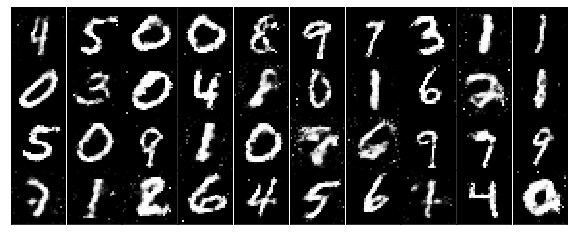

Epoch 34/100 - discriminator loss: 1.2329, generator Loss: 1.5421
Epoch 34/100 - discriminator loss: 1.2306, generator Loss: 0.8697
Epoch 34/100 - discriminator loss: 1.1084, generator Loss: 1.2318
Epoch 34/100 - discriminator loss: 1.0263, generator Loss: 1.2744
Epoch 34/100 - discriminator loss: 1.1472, generator Loss: 0.9723


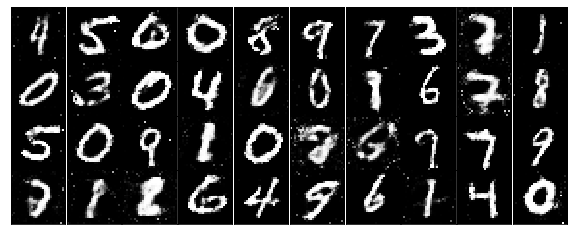

Epoch 35/100 - discriminator loss: 0.9798, generator Loss: 1.0379
Epoch 35/100 - discriminator loss: 1.1446, generator Loss: 0.9538
Epoch 35/100 - discriminator loss: 1.0629, generator Loss: 1.2276
Epoch 35/100 - discriminator loss: 1.0782, generator Loss: 1.0168
Epoch 35/100 - discriminator loss: 1.1157, generator Loss: 1.1036
Epoch 35/100 - discriminator loss: 1.0859, generator Loss: 1.1221


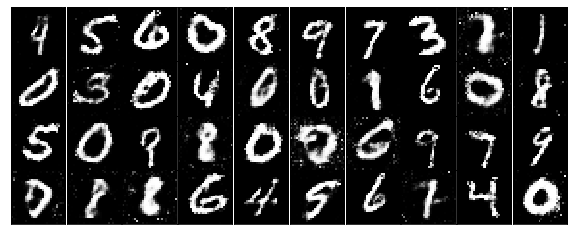

Epoch 36/100 - discriminator loss: 1.0337, generator Loss: 1.0548
Epoch 36/100 - discriminator loss: 1.2489, generator Loss: 1.2373
Epoch 36/100 - discriminator loss: 1.1193, generator Loss: 1.3637
Epoch 36/100 - discriminator loss: 1.1123, generator Loss: 1.0024
Epoch 36/100 - discriminator loss: 1.0858, generator Loss: 1.2300


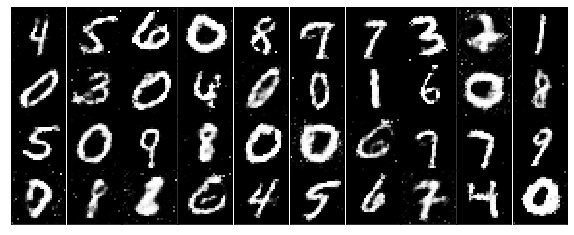

Epoch 37/100 - discriminator loss: 1.1131, generator Loss: 1.2315
Epoch 37/100 - discriminator loss: 1.1522, generator Loss: 1.0030
Epoch 37/100 - discriminator loss: 1.1153, generator Loss: 0.8391
Epoch 37/100 - discriminator loss: 1.1772, generator Loss: 1.3684
Epoch 37/100 - discriminator loss: 1.1471, generator Loss: 1.0849
Epoch 37/100 - discriminator loss: 1.3248, generator Loss: 0.6394


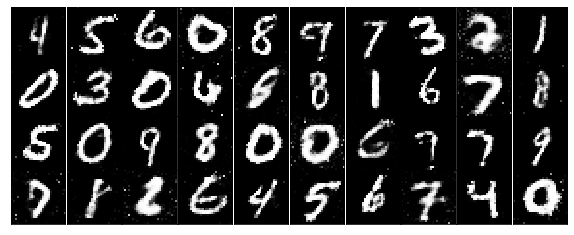

Epoch 38/100 - discriminator loss: 1.0784, generator Loss: 1.2904
Epoch 38/100 - discriminator loss: 1.0325, generator Loss: 0.9797
Epoch 38/100 - discriminator loss: 1.3181, generator Loss: 0.6823
Epoch 38/100 - discriminator loss: 1.2188, generator Loss: 0.7556
Epoch 38/100 - discriminator loss: 1.1052, generator Loss: 1.0000


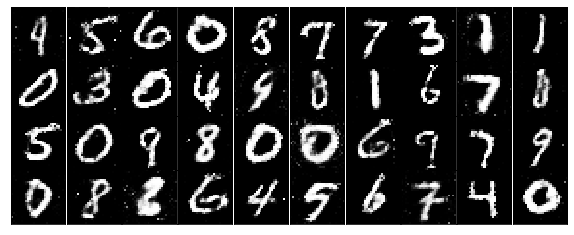

Epoch 39/100 - discriminator loss: 1.1254, generator Loss: 0.9941
Epoch 39/100 - discriminator loss: 1.1917, generator Loss: 1.4593
Epoch 39/100 - discriminator loss: 1.0468, generator Loss: 1.0602
Epoch 39/100 - discriminator loss: 1.0355, generator Loss: 1.0418
Epoch 39/100 - discriminator loss: 1.2051, generator Loss: 1.2796
Epoch 39/100 - discriminator loss: 1.0710, generator Loss: 0.9484


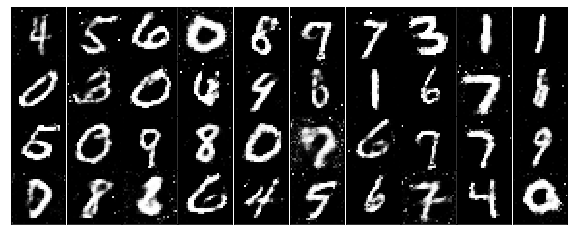

Epoch 40/100 - discriminator loss: 1.0988, generator Loss: 0.9710
Epoch 40/100 - discriminator loss: 1.0493, generator Loss: 1.2369
Epoch 40/100 - discriminator loss: 1.0589, generator Loss: 1.0434
Epoch 40/100 - discriminator loss: 1.0376, generator Loss: 1.2163
Epoch 40/100 - discriminator loss: 1.1024, generator Loss: 1.1396


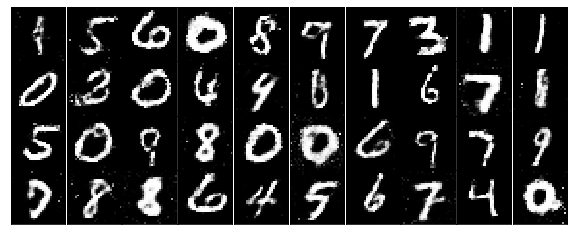

Epoch 41/100 - discriminator loss: 1.0937, generator Loss: 1.2756
Epoch 41/100 - discriminator loss: 1.2063, generator Loss: 0.6457
Epoch 41/100 - discriminator loss: 1.1797, generator Loss: 1.0216
Epoch 41/100 - discriminator loss: 1.1168, generator Loss: 1.2254
Epoch 41/100 - discriminator loss: 1.1178, generator Loss: 1.2275
Epoch 41/100 - discriminator loss: 0.9916, generator Loss: 0.9605


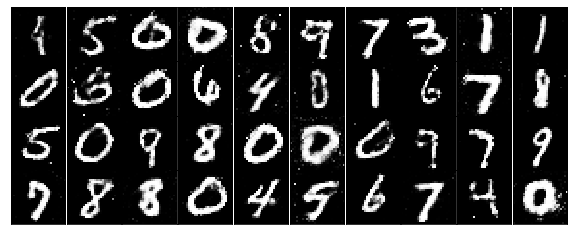

Epoch 42/100 - discriminator loss: 1.1341, generator Loss: 0.9314
Epoch 42/100 - discriminator loss: 1.1436, generator Loss: 0.8194
Epoch 42/100 - discriminator loss: 1.1627, generator Loss: 1.0088
Epoch 42/100 - discriminator loss: 1.0676, generator Loss: 0.9169
Epoch 42/100 - discriminator loss: 1.1879, generator Loss: 1.2698


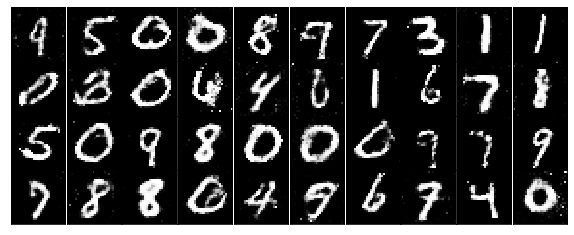

Epoch 43/100 - discriminator loss: 1.0859, generator Loss: 1.2357
Epoch 43/100 - discriminator loss: 0.9876, generator Loss: 1.2641
Epoch 43/100 - discriminator loss: 1.1499, generator Loss: 1.0434
Epoch 43/100 - discriminator loss: 1.1368, generator Loss: 0.8132
Epoch 43/100 - discriminator loss: 1.0125, generator Loss: 0.8663
Epoch 43/100 - discriminator loss: 1.1106, generator Loss: 1.0172


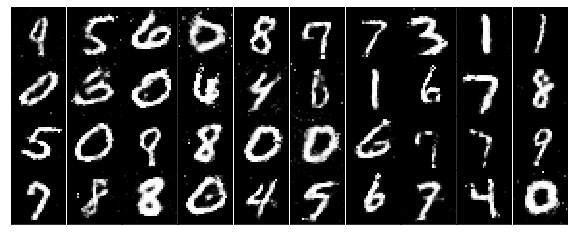

Epoch 44/100 - discriminator loss: 1.0784, generator Loss: 1.2182
Epoch 44/100 - discriminator loss: 1.0816, generator Loss: 1.0518
Epoch 44/100 - discriminator loss: 1.0840, generator Loss: 1.1550
Epoch 44/100 - discriminator loss: 1.1202, generator Loss: 0.8725
Epoch 44/100 - discriminator loss: 1.0594, generator Loss: 1.4215


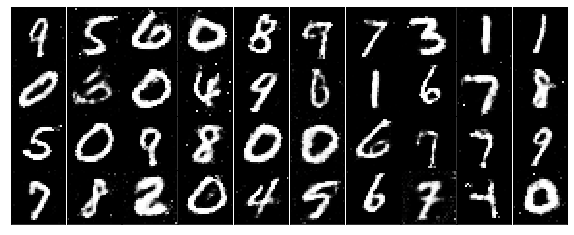

Epoch 45/100 - discriminator loss: 1.0566, generator Loss: 1.3510
Epoch 45/100 - discriminator loss: 1.1325, generator Loss: 1.2907
Epoch 45/100 - discriminator loss: 1.0093, generator Loss: 1.1401
Epoch 45/100 - discriminator loss: 1.0590, generator Loss: 1.4713
Epoch 45/100 - discriminator loss: 1.1188, generator Loss: 1.1675
Epoch 45/100 - discriminator loss: 1.0557, generator Loss: 1.1167


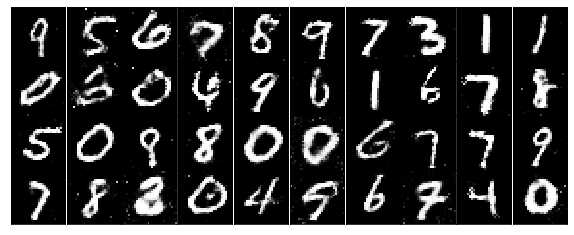

Epoch 46/100 - discriminator loss: 1.0702, generator Loss: 1.2226
Epoch 46/100 - discriminator loss: 1.0385, generator Loss: 1.0080
Epoch 46/100 - discriminator loss: 1.1005, generator Loss: 1.1217
Epoch 46/100 - discriminator loss: 1.0323, generator Loss: 0.9811
Epoch 46/100 - discriminator loss: 1.1614, generator Loss: 0.8487


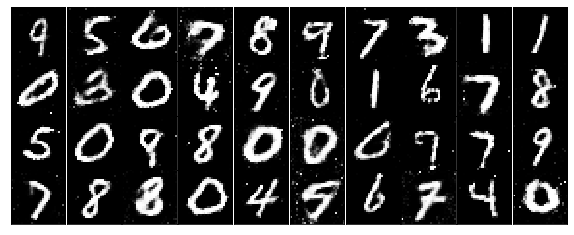

Epoch 47/100 - discriminator loss: 1.0221, generator Loss: 1.1289
Epoch 47/100 - discriminator loss: 1.0588, generator Loss: 1.0515
Epoch 47/100 - discriminator loss: 1.1567, generator Loss: 0.9959
Epoch 47/100 - discriminator loss: 1.0392, generator Loss: 1.1151
Epoch 47/100 - discriminator loss: 1.1093, generator Loss: 1.3925
Epoch 47/100 - discriminator loss: 1.0606, generator Loss: 1.1426


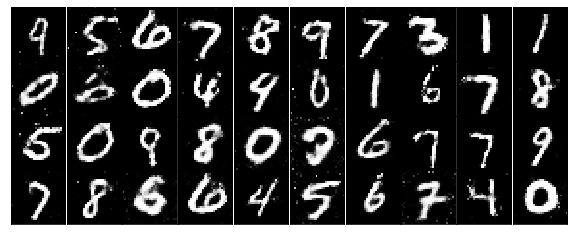

Epoch 48/100 - discriminator loss: 1.0943, generator Loss: 0.9333
Epoch 48/100 - discriminator loss: 1.0910, generator Loss: 1.1692
Epoch 48/100 - discriminator loss: 1.0647, generator Loss: 1.1837
Epoch 48/100 - discriminator loss: 1.0127, generator Loss: 1.1229
Epoch 48/100 - discriminator loss: 1.0235, generator Loss: 1.3000


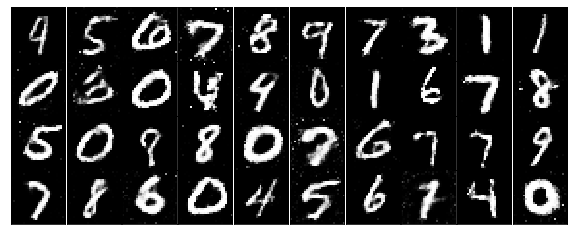

Epoch 49/100 - discriminator loss: 0.9950, generator Loss: 1.2479
Epoch 49/100 - discriminator loss: 0.9846, generator Loss: 1.0967
Epoch 49/100 - discriminator loss: 1.2284, generator Loss: 1.4761
Epoch 49/100 - discriminator loss: 1.0703, generator Loss: 1.1695
Epoch 49/100 - discriminator loss: 1.1023, generator Loss: 1.2671
Epoch 49/100 - discriminator loss: 1.0786, generator Loss: 1.0569


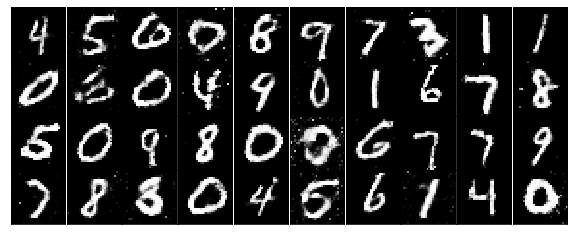

Epoch 50/100 - discriminator loss: 1.0337, generator Loss: 1.4595
Epoch 50/100 - discriminator loss: 1.0722, generator Loss: 1.3644
Epoch 50/100 - discriminator loss: 1.1160, generator Loss: 1.1068
Epoch 50/100 - discriminator loss: 1.0292, generator Loss: 1.3740
Epoch 50/100 - discriminator loss: 0.9891, generator Loss: 1.1215


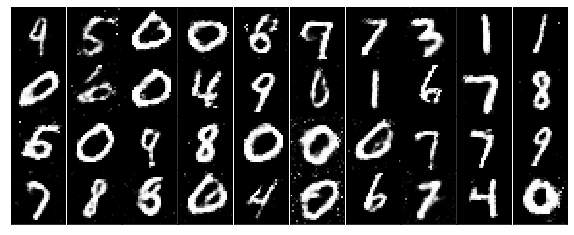

Epoch 51/100 - discriminator loss: 1.0950, generator Loss: 1.3500
Epoch 51/100 - discriminator loss: 1.1600, generator Loss: 0.9515
Epoch 51/100 - discriminator loss: 1.0398, generator Loss: 1.1879
Epoch 51/100 - discriminator loss: 1.0176, generator Loss: 1.3931
Epoch 51/100 - discriminator loss: 1.1942, generator Loss: 1.6145


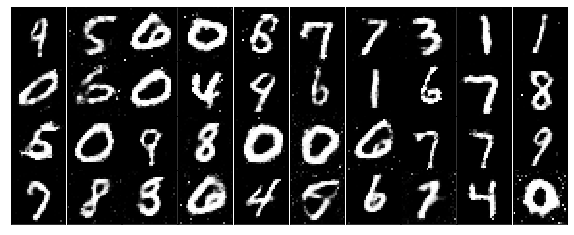

Epoch 52/100 - discriminator loss: 1.1445, generator Loss: 1.0336
Epoch 52/100 - discriminator loss: 1.0880, generator Loss: 1.0309
Epoch 52/100 - discriminator loss: 0.9842, generator Loss: 1.4628
Epoch 52/100 - discriminator loss: 1.0837, generator Loss: 1.2086
Epoch 52/100 - discriminator loss: 1.1260, generator Loss: 1.4085
Epoch 52/100 - discriminator loss: 1.1075, generator Loss: 1.2237


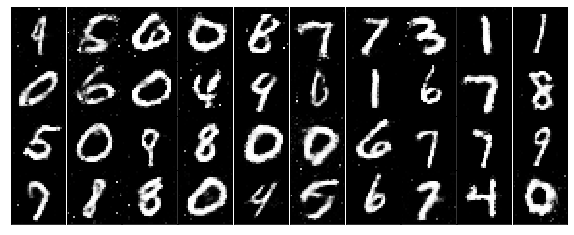

Epoch 53/100 - discriminator loss: 1.0938, generator Loss: 0.8880
Epoch 53/100 - discriminator loss: 1.0748, generator Loss: 1.0199
Epoch 53/100 - discriminator loss: 1.0883, generator Loss: 0.8685
Epoch 53/100 - discriminator loss: 1.0187, generator Loss: 1.3861
Epoch 53/100 - discriminator loss: 0.9877, generator Loss: 1.3367


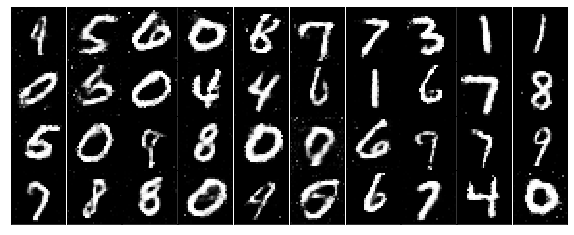

Epoch 54/100 - discriminator loss: 0.9903, generator Loss: 1.4059
Epoch 54/100 - discriminator loss: 0.9951, generator Loss: 1.1073
Epoch 54/100 - discriminator loss: 0.9849, generator Loss: 1.0311
Epoch 54/100 - discriminator loss: 1.0752, generator Loss: 1.0411
Epoch 54/100 - discriminator loss: 1.1296, generator Loss: 1.1832
Epoch 54/100 - discriminator loss: 1.0438, generator Loss: 1.1668


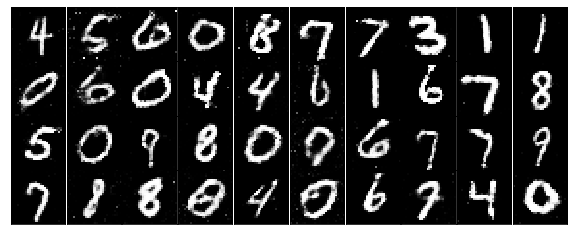

Epoch 55/100 - discriminator loss: 1.0176, generator Loss: 1.0245
Epoch 55/100 - discriminator loss: 0.9161, generator Loss: 1.1282
Epoch 55/100 - discriminator loss: 1.0199, generator Loss: 0.8762
Epoch 55/100 - discriminator loss: 1.1516, generator Loss: 0.9838
Epoch 55/100 - discriminator loss: 1.0091, generator Loss: 1.4046


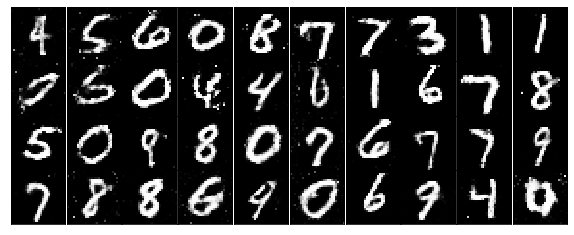

Epoch 56/100 - discriminator loss: 1.1446, generator Loss: 1.5772
Epoch 56/100 - discriminator loss: 1.0240, generator Loss: 1.1305
Epoch 56/100 - discriminator loss: 1.0605, generator Loss: 1.3143
Epoch 56/100 - discriminator loss: 1.0042, generator Loss: 1.2281
Epoch 56/100 - discriminator loss: 0.9951, generator Loss: 1.2151
Epoch 56/100 - discriminator loss: 1.0850, generator Loss: 0.8591


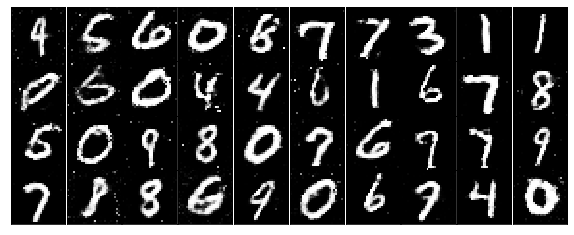

Epoch 57/100 - discriminator loss: 1.1127, generator Loss: 0.9786
Epoch 57/100 - discriminator loss: 0.9974, generator Loss: 1.0365
Epoch 57/100 - discriminator loss: 1.0948, generator Loss: 0.9070
Epoch 57/100 - discriminator loss: 0.9707, generator Loss: 1.0566
Epoch 57/100 - discriminator loss: 1.0401, generator Loss: 1.2036


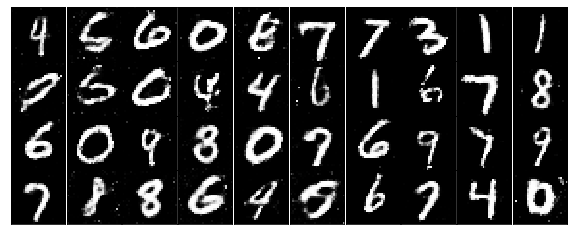

Epoch 58/100 - discriminator loss: 1.0727, generator Loss: 0.9150
Epoch 58/100 - discriminator loss: 0.9500, generator Loss: 1.4133
Epoch 58/100 - discriminator loss: 0.9858, generator Loss: 1.1960
Epoch 58/100 - discriminator loss: 1.0148, generator Loss: 1.3396
Epoch 58/100 - discriminator loss: 1.1109, generator Loss: 1.3520
Epoch 58/100 - discriminator loss: 1.0021, generator Loss: 1.1035


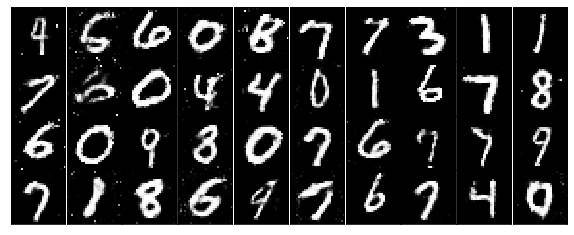

Epoch 59/100 - discriminator loss: 1.0047, generator Loss: 1.0895
Epoch 59/100 - discriminator loss: 1.0474, generator Loss: 0.8387
Epoch 59/100 - discriminator loss: 1.0376, generator Loss: 0.9583
Epoch 59/100 - discriminator loss: 0.9124, generator Loss: 1.5620
Epoch 59/100 - discriminator loss: 1.0355, generator Loss: 1.2495


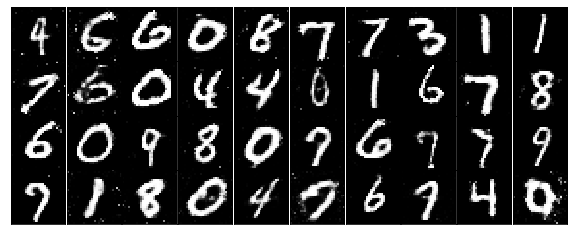

Epoch 60/100 - discriminator loss: 0.9567, generator Loss: 1.1406
Epoch 60/100 - discriminator loss: 1.1016, generator Loss: 1.6728
Epoch 60/100 - discriminator loss: 1.0864, generator Loss: 1.5029
Epoch 60/100 - discriminator loss: 1.0574, generator Loss: 1.2653
Epoch 60/100 - discriminator loss: 1.0945, generator Loss: 1.1216
Epoch 60/100 - discriminator loss: 1.1629, generator Loss: 1.1943


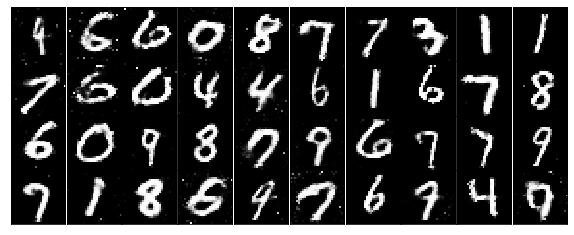

Epoch 61/100 - discriminator loss: 1.0339, generator Loss: 1.3042
Epoch 61/100 - discriminator loss: 0.9666, generator Loss: 1.0871
Epoch 61/100 - discriminator loss: 1.0894, generator Loss: 1.3667
Epoch 61/100 - discriminator loss: 1.0295, generator Loss: 1.1683
Epoch 61/100 - discriminator loss: 1.0281, generator Loss: 1.3368


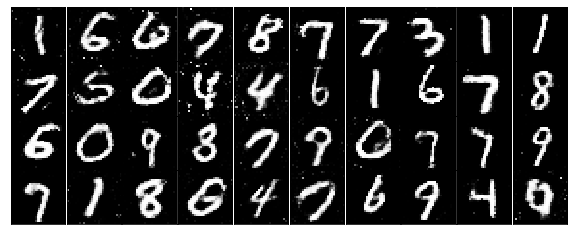

Epoch 62/100 - discriminator loss: 0.9436, generator Loss: 0.9155
Epoch 62/100 - discriminator loss: 1.1416, generator Loss: 1.6705
Epoch 62/100 - discriminator loss: 0.9870, generator Loss: 1.3102
Epoch 62/100 - discriminator loss: 0.9392, generator Loss: 1.5837
Epoch 62/100 - discriminator loss: 1.0680, generator Loss: 0.8256
Epoch 62/100 - discriminator loss: 1.0659, generator Loss: 1.1342


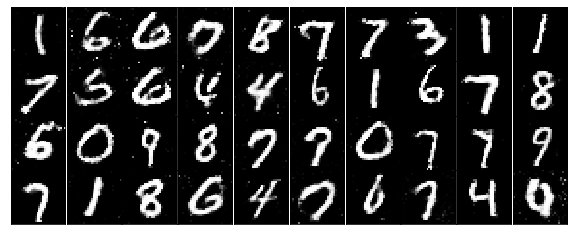

Epoch 63/100 - discriminator loss: 1.0459, generator Loss: 1.0835
Epoch 63/100 - discriminator loss: 1.1151, generator Loss: 1.4575
Epoch 63/100 - discriminator loss: 1.0055, generator Loss: 1.0866
Epoch 63/100 - discriminator loss: 0.9772, generator Loss: 1.4213
Epoch 63/100 - discriminator loss: 1.0100, generator Loss: 1.0593


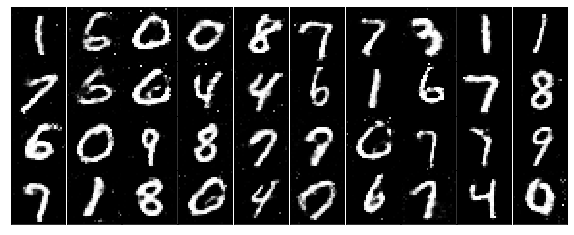

Epoch 64/100 - discriminator loss: 1.0556, generator Loss: 1.3531
Epoch 64/100 - discriminator loss: 1.0653, generator Loss: 1.1927
Epoch 64/100 - discriminator loss: 1.0812, generator Loss: 1.4507
Epoch 64/100 - discriminator loss: 0.9982, generator Loss: 1.3206
Epoch 64/100 - discriminator loss: 0.9956, generator Loss: 1.2341
Epoch 64/100 - discriminator loss: 1.0715, generator Loss: 1.0424


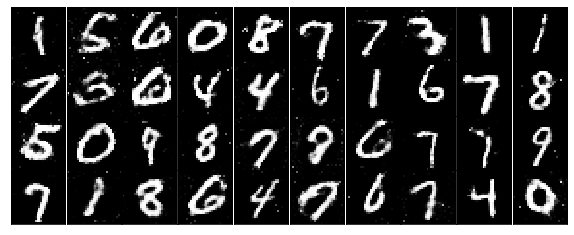

Epoch 65/100 - discriminator loss: 1.0536, generator Loss: 1.0987
Epoch 65/100 - discriminator loss: 0.9675, generator Loss: 1.1160
Epoch 65/100 - discriminator loss: 0.9674, generator Loss: 1.6013
Epoch 65/100 - discriminator loss: 1.0392, generator Loss: 0.9405
Epoch 65/100 - discriminator loss: 1.0493, generator Loss: 1.1558


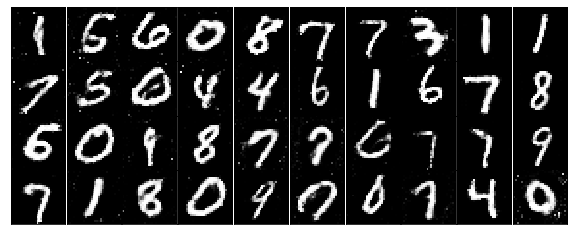

Epoch 66/100 - discriminator loss: 1.0309, generator Loss: 1.4326
Epoch 66/100 - discriminator loss: 0.9533, generator Loss: 1.1476
Epoch 66/100 - discriminator loss: 1.0752, generator Loss: 1.2500
Epoch 66/100 - discriminator loss: 0.9298, generator Loss: 0.9741
Epoch 66/100 - discriminator loss: 1.1676, generator Loss: 0.7968
Epoch 66/100 - discriminator loss: 0.9377, generator Loss: 1.2310


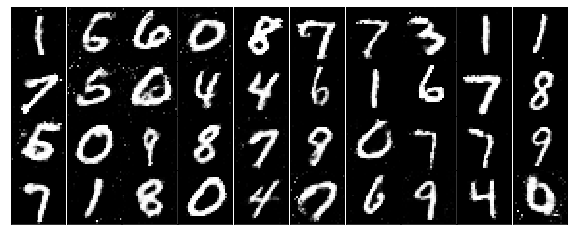

Epoch 67/100 - discriminator loss: 1.0922, generator Loss: 1.4966
Epoch 67/100 - discriminator loss: 0.9927, generator Loss: 0.9740
Epoch 67/100 - discriminator loss: 0.9385, generator Loss: 1.0097
Epoch 67/100 - discriminator loss: 0.9772, generator Loss: 1.3234
Epoch 67/100 - discriminator loss: 0.9090, generator Loss: 1.1046


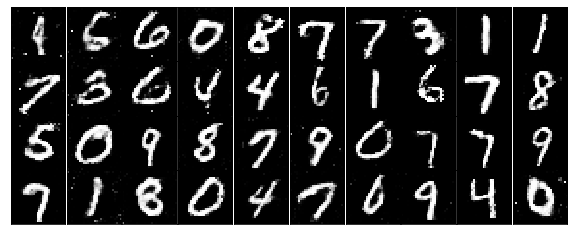

Epoch 68/100 - discriminator loss: 1.0431, generator Loss: 1.0853
Epoch 68/100 - discriminator loss: 1.0135, generator Loss: 1.0321
Epoch 68/100 - discriminator loss: 0.8773, generator Loss: 1.1480
Epoch 68/100 - discriminator loss: 0.9720, generator Loss: 0.9832
Epoch 68/100 - discriminator loss: 1.0383, generator Loss: 1.0577


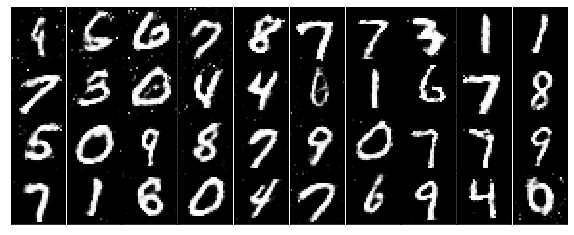

Epoch 69/100 - discriminator loss: 0.9478, generator Loss: 0.8915
Epoch 69/100 - discriminator loss: 0.8624, generator Loss: 1.3914
Epoch 69/100 - discriminator loss: 0.9321, generator Loss: 1.1886
Epoch 69/100 - discriminator loss: 1.1675, generator Loss: 1.1684
Epoch 69/100 - discriminator loss: 1.0473, generator Loss: 1.0617
Epoch 69/100 - discriminator loss: 1.1353, generator Loss: 1.1308


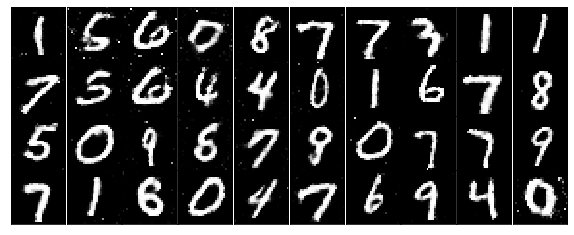

Epoch 70/100 - discriminator loss: 1.1488, generator Loss: 1.7193
Epoch 70/100 - discriminator loss: 0.9833, generator Loss: 1.2497
Epoch 70/100 - discriminator loss: 1.0318, generator Loss: 0.9303
Epoch 70/100 - discriminator loss: 0.9251, generator Loss: 1.0591
Epoch 70/100 - discriminator loss: 1.1519, generator Loss: 1.1064


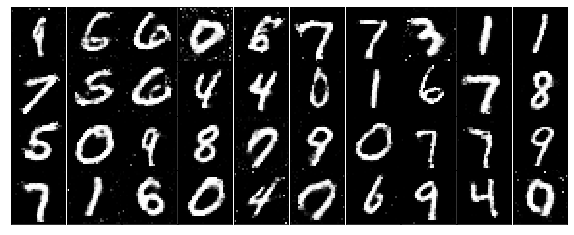

Epoch 71/100 - discriminator loss: 1.0692, generator Loss: 1.7233
Epoch 71/100 - discriminator loss: 0.9739, generator Loss: 1.4401
Epoch 71/100 - discriminator loss: 0.9866, generator Loss: 1.4132
Epoch 71/100 - discriminator loss: 1.0066, generator Loss: 1.2587
Epoch 71/100 - discriminator loss: 1.0501, generator Loss: 1.1435
Epoch 71/100 - discriminator loss: 1.0442, generator Loss: 1.3568


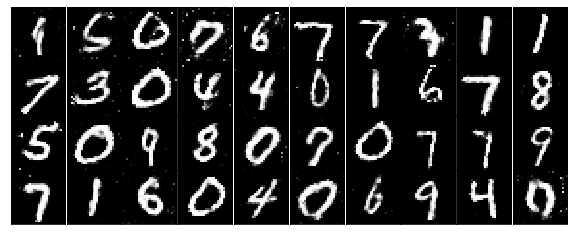

Epoch 72/100 - discriminator loss: 0.9134, generator Loss: 1.3347
Epoch 72/100 - discriminator loss: 0.9853, generator Loss: 1.1867
Epoch 72/100 - discriminator loss: 0.9507, generator Loss: 1.2188
Epoch 72/100 - discriminator loss: 0.9172, generator Loss: 1.0915
Epoch 72/100 - discriminator loss: 1.0631, generator Loss: 1.0799


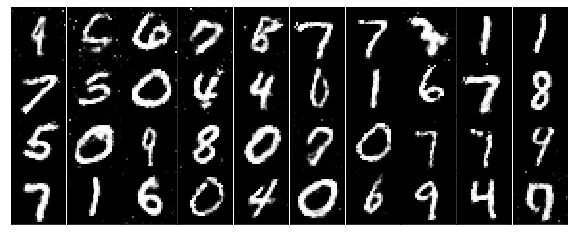

Epoch 73/100 - discriminator loss: 0.9400, generator Loss: 1.1021
Epoch 73/100 - discriminator loss: 1.0688, generator Loss: 0.7145
Epoch 73/100 - discriminator loss: 0.8970, generator Loss: 1.3513
Epoch 73/100 - discriminator loss: 0.9961, generator Loss: 1.0318
Epoch 73/100 - discriminator loss: 1.1042, generator Loss: 0.7462
Epoch 73/100 - discriminator loss: 1.0986, generator Loss: 1.6177


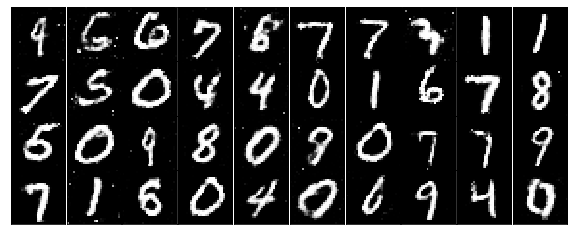

Epoch 74/100 - discriminator loss: 0.9366, generator Loss: 1.1310
Epoch 74/100 - discriminator loss: 1.0873, generator Loss: 1.1370
Epoch 74/100 - discriminator loss: 1.0230, generator Loss: 1.1345
Epoch 74/100 - discriminator loss: 0.9625, generator Loss: 1.2025
Epoch 74/100 - discriminator loss: 0.9543, generator Loss: 1.4544


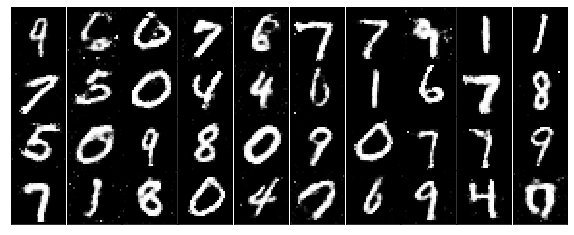

Epoch 75/100 - discriminator loss: 1.0927, generator Loss: 1.5255
Epoch 75/100 - discriminator loss: 1.0166, generator Loss: 1.1679
Epoch 75/100 - discriminator loss: 1.0162, generator Loss: 1.0022
Epoch 75/100 - discriminator loss: 0.9550, generator Loss: 1.5314
Epoch 75/100 - discriminator loss: 0.9672, generator Loss: 1.3221
Epoch 75/100 - discriminator loss: 0.9568, generator Loss: 1.1961


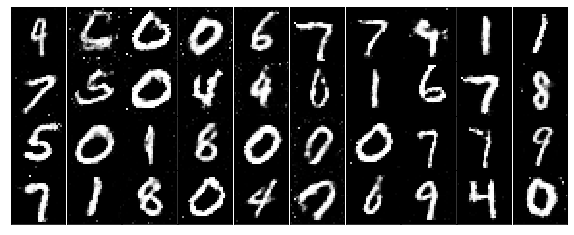

Epoch 76/100 - discriminator loss: 0.8009, generator Loss: 1.2908
Epoch 76/100 - discriminator loss: 0.9946, generator Loss: 1.2162
Epoch 76/100 - discriminator loss: 1.0476, generator Loss: 1.3056
Epoch 76/100 - discriminator loss: 0.9678, generator Loss: 1.1098
Epoch 76/100 - discriminator loss: 0.9264, generator Loss: 1.2461


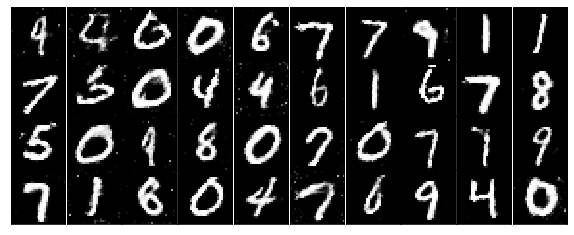

Epoch 77/100 - discriminator loss: 0.9581, generator Loss: 1.6548
Epoch 77/100 - discriminator loss: 0.9422, generator Loss: 1.2009
Epoch 77/100 - discriminator loss: 1.0453, generator Loss: 1.2052
Epoch 77/100 - discriminator loss: 1.1501, generator Loss: 1.3812
Epoch 77/100 - discriminator loss: 0.9180, generator Loss: 1.2564
Epoch 77/100 - discriminator loss: 1.0240, generator Loss: 1.1352


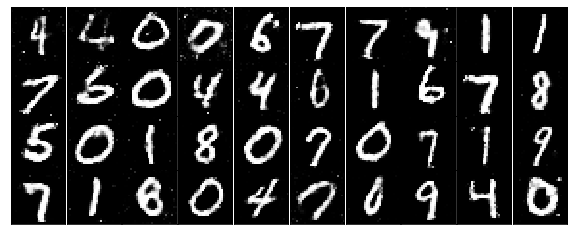

Epoch 78/100 - discriminator loss: 0.9993, generator Loss: 1.5040
Epoch 78/100 - discriminator loss: 0.9324, generator Loss: 1.0458
Epoch 78/100 - discriminator loss: 0.9873, generator Loss: 1.0667
Epoch 78/100 - discriminator loss: 1.0192, generator Loss: 1.3706
Epoch 78/100 - discriminator loss: 0.9204, generator Loss: 1.1392


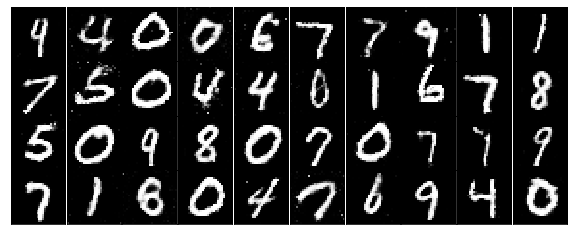

Epoch 79/100 - discriminator loss: 1.0398, generator Loss: 1.1376
Epoch 79/100 - discriminator loss: 0.9621, generator Loss: 1.1987
Epoch 79/100 - discriminator loss: 0.9682, generator Loss: 1.2676
Epoch 79/100 - discriminator loss: 0.9955, generator Loss: 1.1312
Epoch 79/100 - discriminator loss: 1.0891, generator Loss: 1.0548
Epoch 79/100 - discriminator loss: 0.9631, generator Loss: 1.2268


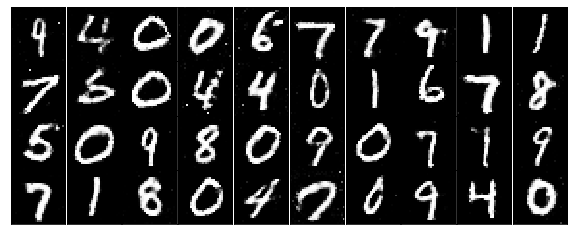

Epoch 80/100 - discriminator loss: 0.9588, generator Loss: 1.0426
Epoch 80/100 - discriminator loss: 0.9652, generator Loss: 1.2246
Epoch 80/100 - discriminator loss: 0.9838, generator Loss: 1.1984
Epoch 80/100 - discriminator loss: 0.9154, generator Loss: 1.4495
Epoch 80/100 - discriminator loss: 1.0596, generator Loss: 0.9919


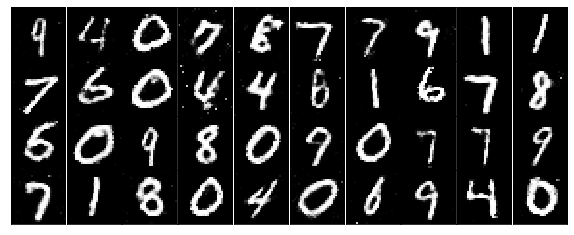

Epoch 81/100 - discriminator loss: 0.8913, generator Loss: 1.2167
Epoch 81/100 - discriminator loss: 0.9171, generator Loss: 1.1665
Epoch 81/100 - discriminator loss: 0.8823, generator Loss: 1.2443
Epoch 81/100 - discriminator loss: 0.9241, generator Loss: 1.1970
Epoch 81/100 - discriminator loss: 0.9935, generator Loss: 1.1743
Epoch 81/100 - discriminator loss: 0.8377, generator Loss: 1.3720


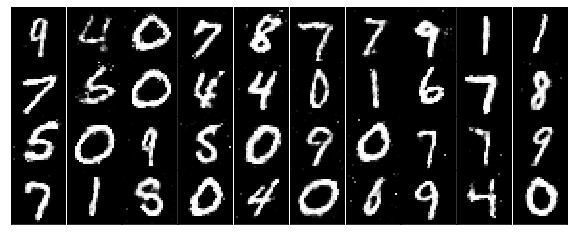

Epoch 82/100 - discriminator loss: 0.8915, generator Loss: 1.2805
Epoch 82/100 - discriminator loss: 0.9713, generator Loss: 1.0224
Epoch 82/100 - discriminator loss: 0.9925, generator Loss: 1.3375
Epoch 82/100 - discriminator loss: 0.9868, generator Loss: 1.2174
Epoch 82/100 - discriminator loss: 0.9062, generator Loss: 1.1278


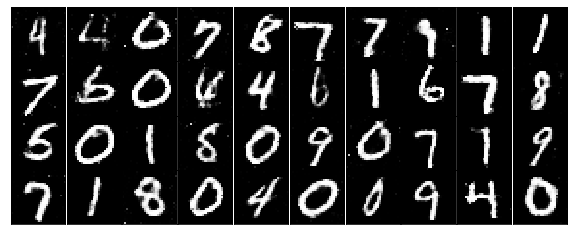

Epoch 83/100 - discriminator loss: 0.8331, generator Loss: 1.5406
Epoch 83/100 - discriminator loss: 1.0510, generator Loss: 1.1813
Epoch 83/100 - discriminator loss: 1.2372, generator Loss: 0.5634
Epoch 83/100 - discriminator loss: 1.0401, generator Loss: 1.0681
Epoch 83/100 - discriminator loss: 0.9196, generator Loss: 1.1761
Epoch 83/100 - discriminator loss: 0.9990, generator Loss: 1.1308


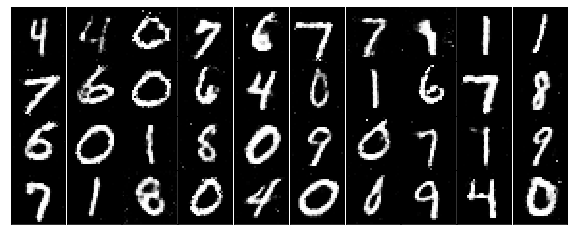

Epoch 84/100 - discriminator loss: 0.9864, generator Loss: 1.1060
Epoch 84/100 - discriminator loss: 0.9040, generator Loss: 0.9953
Epoch 84/100 - discriminator loss: 1.0941, generator Loss: 0.8580
Epoch 84/100 - discriminator loss: 1.0036, generator Loss: 1.3665
Epoch 84/100 - discriminator loss: 0.9285, generator Loss: 1.1158


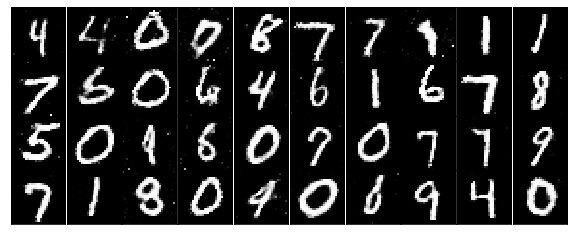

Epoch 85/100 - discriminator loss: 0.9552, generator Loss: 1.2939
Epoch 85/100 - discriminator loss: 0.9568, generator Loss: 1.3724
Epoch 85/100 - discriminator loss: 1.0047, generator Loss: 1.2905
Epoch 85/100 - discriminator loss: 0.9828, generator Loss: 1.0371
Epoch 85/100 - discriminator loss: 0.8914, generator Loss: 1.1001


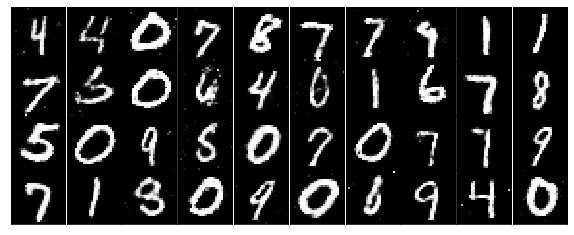

Epoch 86/100 - discriminator loss: 0.9489, generator Loss: 1.3165
Epoch 86/100 - discriminator loss: 0.9751, generator Loss: 1.1789
Epoch 86/100 - discriminator loss: 1.0309, generator Loss: 1.2115
Epoch 86/100 - discriminator loss: 0.9175, generator Loss: 1.3299
Epoch 86/100 - discriminator loss: 0.9168, generator Loss: 1.2265
Epoch 86/100 - discriminator loss: 1.0686, generator Loss: 1.0610


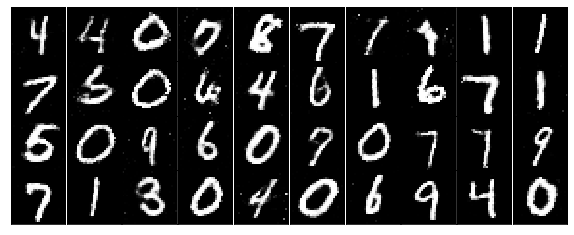

Epoch 87/100 - discriminator loss: 0.9732, generator Loss: 1.1497
Epoch 87/100 - discriminator loss: 0.8689, generator Loss: 1.3917
Epoch 87/100 - discriminator loss: 0.8794, generator Loss: 1.1587
Epoch 87/100 - discriminator loss: 0.9953, generator Loss: 1.3015
Epoch 87/100 - discriminator loss: 1.1197, generator Loss: 0.6766


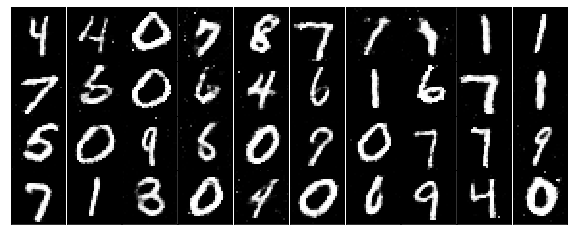

Epoch 88/100 - discriminator loss: 0.8736, generator Loss: 1.5227
Epoch 88/100 - discriminator loss: 0.8882, generator Loss: 1.3951
Epoch 88/100 - discriminator loss: 0.9269, generator Loss: 1.4078
Epoch 88/100 - discriminator loss: 0.8595, generator Loss: 1.1830
Epoch 88/100 - discriminator loss: 0.9881, generator Loss: 1.1691
Epoch 88/100 - discriminator loss: 0.9227, generator Loss: 1.2460


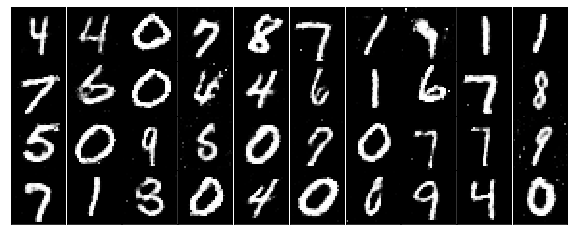

Epoch 89/100 - discriminator loss: 1.0484, generator Loss: 1.1649
Epoch 89/100 - discriminator loss: 0.9320, generator Loss: 1.1974
Epoch 89/100 - discriminator loss: 0.9638, generator Loss: 1.1758
Epoch 89/100 - discriminator loss: 0.8752, generator Loss: 1.3064
Epoch 89/100 - discriminator loss: 0.9646, generator Loss: 1.0199


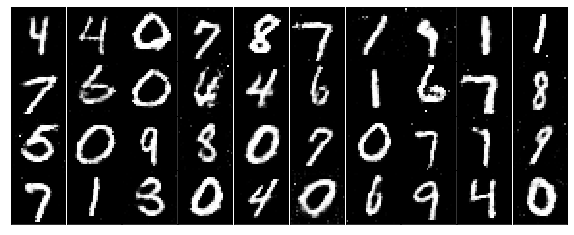

Epoch 90/100 - discriminator loss: 1.0011, generator Loss: 1.4697
Epoch 90/100 - discriminator loss: 0.9065, generator Loss: 1.3093
Epoch 90/100 - discriminator loss: 0.9330, generator Loss: 1.3767
Epoch 90/100 - discriminator loss: 0.8846, generator Loss: 1.3004
Epoch 90/100 - discriminator loss: 0.9575, generator Loss: 0.9852
Epoch 90/100 - discriminator loss: 0.8855, generator Loss: 1.0652


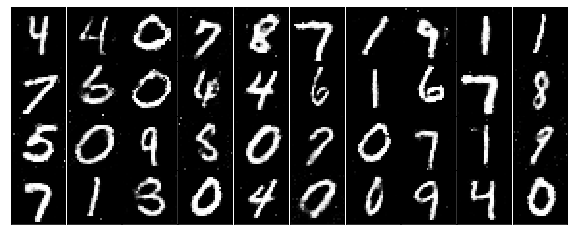

Epoch 91/100 - discriminator loss: 0.9340, generator Loss: 1.2863
Epoch 91/100 - discriminator loss: 0.9050, generator Loss: 1.6016
Epoch 91/100 - discriminator loss: 0.9763, generator Loss: 1.2363
Epoch 91/100 - discriminator loss: 0.8848, generator Loss: 1.4260
Epoch 91/100 - discriminator loss: 0.9236, generator Loss: 1.1420


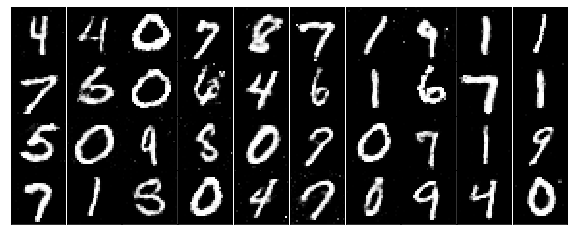

Epoch 92/100 - discriminator loss: 0.8524, generator Loss: 1.6262
Epoch 92/100 - discriminator loss: 0.8502, generator Loss: 1.5942
Epoch 92/100 - discriminator loss: 1.0936, generator Loss: 1.7841
Epoch 92/100 - discriminator loss: 1.1028, generator Loss: 1.3847
Epoch 92/100 - discriminator loss: 1.0179, generator Loss: 0.9140
Epoch 92/100 - discriminator loss: 0.8794, generator Loss: 1.1633


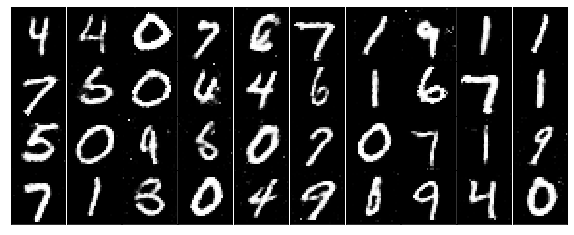

Epoch 93/100 - discriminator loss: 0.9569, generator Loss: 1.2270
Epoch 93/100 - discriminator loss: 0.9285, generator Loss: 1.8345
Epoch 93/100 - discriminator loss: 1.0003, generator Loss: 1.5268
Epoch 93/100 - discriminator loss: 1.0581, generator Loss: 1.1282
Epoch 93/100 - discriminator loss: 0.7983, generator Loss: 1.2738


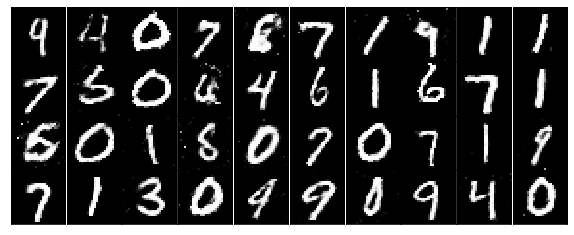

Epoch 94/100 - discriminator loss: 0.9544, generator Loss: 1.3331
Epoch 94/100 - discriminator loss: 0.9235, generator Loss: 1.7774
Epoch 94/100 - discriminator loss: 0.9024, generator Loss: 1.4200
Epoch 94/100 - discriminator loss: 1.1031, generator Loss: 1.1130
Epoch 94/100 - discriminator loss: 0.9386, generator Loss: 1.1401
Epoch 94/100 - discriminator loss: 0.8775, generator Loss: 1.1298


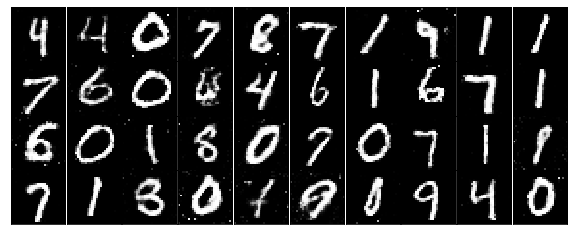

Epoch 95/100 - discriminator loss: 0.8604, generator Loss: 1.2408
Epoch 95/100 - discriminator loss: 0.9633, generator Loss: 1.3543
Epoch 95/100 - discriminator loss: 0.8845, generator Loss: 1.3591
Epoch 95/100 - discriminator loss: 0.8454, generator Loss: 1.1846
Epoch 95/100 - discriminator loss: 0.9873, generator Loss: 1.3469


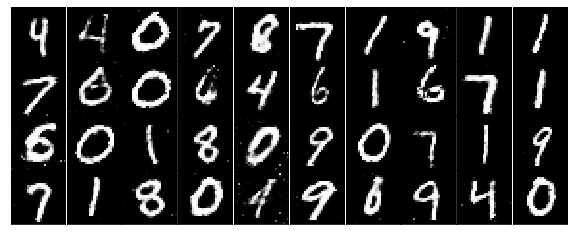

Epoch 96/100 - discriminator loss: 0.8385, generator Loss: 1.2189
Epoch 96/100 - discriminator loss: 0.8551, generator Loss: 1.2063
Epoch 96/100 - discriminator loss: 0.7706, generator Loss: 1.3111
Epoch 96/100 - discriminator loss: 0.9296, generator Loss: 1.3142
Epoch 96/100 - discriminator loss: 0.8130, generator Loss: 1.4654
Epoch 96/100 - discriminator loss: 0.9625, generator Loss: 1.3898


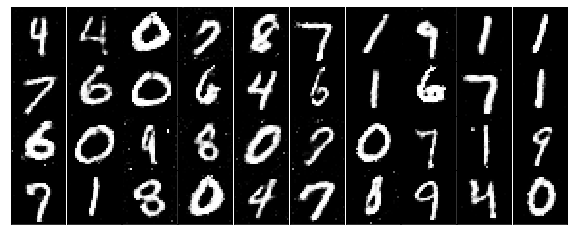

Epoch 97/100 - discriminator loss: 0.9402, generator Loss: 1.5927
Epoch 97/100 - discriminator loss: 0.9071, generator Loss: 1.4284
Epoch 97/100 - discriminator loss: 0.9154, generator Loss: 1.1181
Epoch 97/100 - discriminator loss: 0.8330, generator Loss: 1.4604
Epoch 97/100 - discriminator loss: 0.9776, generator Loss: 1.5106


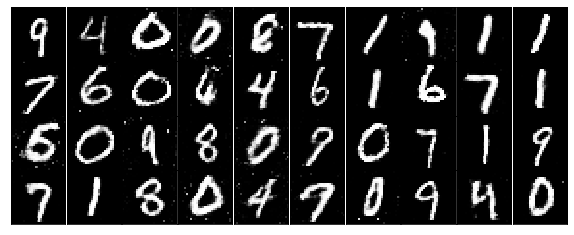

Epoch 98/100 - discriminator loss: 0.8287, generator Loss: 1.4247
Epoch 98/100 - discriminator loss: 0.8602, generator Loss: 1.4342
Epoch 98/100 - discriminator loss: 0.9161, generator Loss: 1.5970
Epoch 98/100 - discriminator loss: 0.8442, generator Loss: 1.2882
Epoch 98/100 - discriminator loss: 0.9795, generator Loss: 0.9312
Epoch 98/100 - discriminator loss: 0.8528, generator Loss: 1.5403


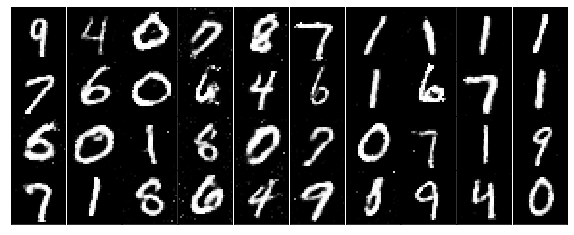

Epoch 99/100 - discriminator loss: 0.8926, generator Loss: 1.1489
Epoch 99/100 - discriminator loss: 0.8948, generator Loss: 1.4147
Epoch 99/100 - discriminator loss: 0.8784, generator Loss: 1.4252
Epoch 99/100 - discriminator loss: 0.8573, generator Loss: 1.4160
Epoch 99/100 - discriminator loss: 0.9015, generator Loss: 1.4919


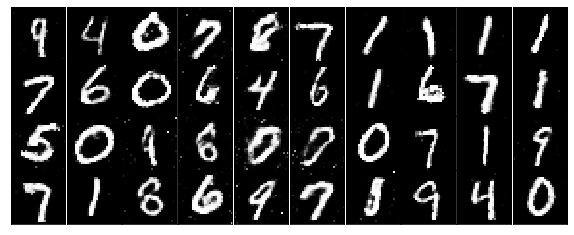

Epoch 100/100 - discriminator loss: 0.8740, generator Loss: 1.2585
Epoch 100/100 - discriminator loss: 0.8937, generator Loss: 1.3314
Epoch 100/100 - discriminator loss: 0.8981, generator Loss: 1.2580
Epoch 100/100 - discriminator loss: 0.9380, generator Loss: 1.4163
Epoch 100/100 - discriminator loss: 0.8821, generator Loss: 1.4174


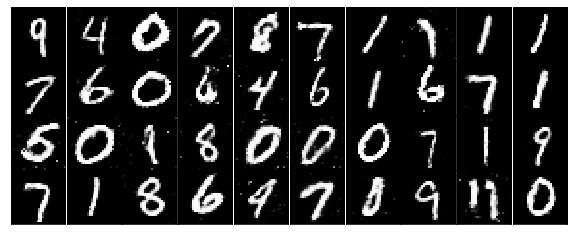

In [68]:
with tf.Session() as sess:
    merged = tf.summary.merge_all()
    train_writer = tf.summary.FileWriter('./logdir/vanilla', sess.graph)

    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        for batch_x in gen_batches(data, batch_size):

            batch_z = np.random.uniform(-1, 1, size=(batch_size, noise_size))

            _, summary, d_loss_batch = sess.run([d_opt, merged, d_loss], feed_dict={z: batch_z, X_real: batch_x})

            sess.run(g_opt, feed_dict={z: batch_z})
            _, g_loss_batch = sess.run([g_opt, g_loss], feed_dict={z: batch_z})

            if steps % 100 == 0:
                train_writer.add_summary(summary, steps)
                print("Epoch {}/{} - discriminator loss: {:.4f}, generator Loss: {:.4f}".format(
                    epoch + 1, epochs, d_loss_batch, g_loss_batch))


            steps += 1

        gen_samples = sess.run(generator(z), feed_dict={z: sample_z})

        display_images(gen_samples)
